# Use of graph property 
Finally Using Regularity

meeting 14:
1. cross Plots using 15 nodes, finding regularity and using for testing
2. train wrt one month 
3. cross validate on other months data

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
import random
import scipy.stats as stats
from scipy.stats import poisson
from numpy import random
import statsmodels.api as sm
import statsmodels.api as sm
import seaborn as sns
from numpy import linalg as LA


# Remove Nan Value

In [2]:
df_Graph01 = pd.read_csv(r'2019-01-XX.csv', index_col=0)
df_Graph01 


FileNotFoundError: [Errno 2] No such file or directory: '2019-01-XX.csv'

In [ ]:
df_Graph01['DEST'].value_counts()


ATL    31151
ORD    26212
DFW    23078
CLT    19105
DEN    18498
       ...  
PPG       11
HGR       10
ADK        9
OWB        9
OGD        8
Name: DEST, Length: 346, dtype: int64

In [ ]:
n = 10
top = df_Graph01['DEST'].value_counts()[:n].index.tolist()
top

['ATL', 'ORD', 'DFW', 'CLT', 'DEN', 'LAX', 'PHX', 'IAH', 'LGA', 'SFO']

In [ ]:
numerical = [var for var in df_Graph01.columns if df_Graph01[var].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)


There are 3 numerical variables

The numerical variables are : ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE']


In [ ]:
df_Graph01[numerical].isna().sum()



DEP_DELAY    16355
ARR_DELAY    18022
DISTANCE         0
dtype: int64

In [ ]:
medianArr = df_Graph01.ARR_DELAY.median()
medianDep = df_Graph01.DEP_DELAY.median()
medianDist = df_Graph01.DISTANCE.median()
print(medianArr, medianDep, medianDist)

# replace NULL with median of arrdelay and depdelay
df_Graph01.ARR_DELAY = df_Graph01.ARR_DELAY.fillna(medianArr)
df_Graph01.DEP_DELAY = df_Graph01.DEP_DELAY.fillna(medianDep)
df_Graph01.DISTANCE = df_Graph01.DISTANCE.fillna(medianDist)

# df_Graph01.drop(['Unnamed: 0', 'FL_DATE', 'DEP_TIME','ARR_TIME', 'AIR_TIME'], axis=1, inplace=True)

df_Graph01


-7.0 -3.0 640.0


,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,DISTANCE
0,GNV,ATL,1.0,-1.0,300.0
1,MSP,CVG,-5.0,-36.0,596.0
2,DTW,CVG,-5.0,-16.0,229.0
3,TLH,ATL,-6.0,-14.0,223.0
4,ATL,FSM,-15.0,-25.0,579.0
...,...,...,...,...,...
583980,GUM,HNL,-1.0,-23.0,3801.0
583981,GUM,SPN,-13.0,-12.0,129.0
583982,SPN,GUM,-18.0,-22.0,129.0
583983,SPN,GUM,-5.0,-11.0,129.0


In [ ]:
df_Graph01
df_Graph01.to_csv('df_Graph01.csv')


In [ ]:
df_Graph01.shape

(583985, 5)

In [ ]:
print(df_Graph01.head())
print(df_Graph01.columns)


  ORIGIN DEST  DEP_DELAY  ARR_DELAY  DISTANCE
0    GNV  ATL        1.0       -1.0     300.0
1    MSP  CVG       -5.0      -36.0     596.0
2    DTW  CVG       -5.0      -16.0     229.0
3    TLH  ATL       -6.0      -14.0     223.0
4    ATL  FSM      -15.0      -25.0     579.0
Index(['ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE'], dtype='object')


In [ ]:
df_Graph01[numerical].isna().sum()


DEP_DELAY    0
ARR_DELAY    0
DISTANCE     0
dtype: int64

# Creating Poisson Distribution

<class 'numpy.ndarray'>
[768 815 710 791 714 729 713 756 734 728 806 724 744 771 711 763 725 730
 775 750]


<AxesSubplot:ylabel='Count'>

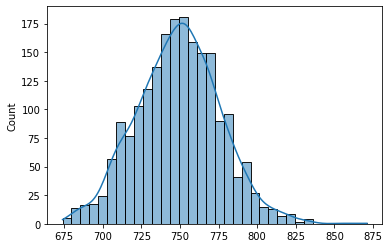

In [ ]:
itrn = 2000
lamda = 750

nf = stats.poisson.rvs(size=itrn, mu=lamda)
print(type(nf))
print(nf[0:20])
sns.histplot(data=None, x=nf, binwidth=None, kde=True)


In [ ]:
print(df_Graph01.columns)

Index(['ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE'], dtype='object')


import numpy as np

import statsmodels.api as sm

spector_data = sm.datasets.spector.load()

spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, spector_data.exog)

res = mod.fit()

print(res.summary())


# Use only selected airport

In [ ]:
top

['ATL', 'ORD', 'DFW', 'CLT', 'DEN', 'LAX', 'PHX', 'IAH', 'LGA', 'SFO']

In [ ]:
# df_Graph01  = df_Graph01[df_Graph01['DEST'].isin(top)] 
df_Graph02 = df_Graph01.loc[df_Graph01.DEST.isin(top) & df_Graph01.ORIGIN.isin(top)]
df_Graph02.to_csv("top_10.txt")

In [ ]:
df_Graph02


,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,DISTANCE
226,LAX,DFW,21.0,12.0,1235.0
227,LGA,ORD,-3.0,-8.0,733.0
228,ORD,LGA,-3.0,-17.0,733.0
231,LGA,ORD,-4.0,-9.0,733.0
240,ORD,LGA,30.0,12.0,733.0
...,...,...,...,...,...
583939,DEN,PHX,-7.0,-36.0,602.0
583941,PHX,IAH,-4.0,-6.0,1009.0
583954,SFO,DEN,-1.0,-5.0,967.0
583955,ORD,SFO,-3.0,-7.0,1846.0


# Regularity finding


In [ ]:
def merge(df1, df2):
    # print(df1)
    # print(df2)
    # print(df1.values)
    # print(df1.shape)
    # for key, values in df2:
    #     if key not in df1:
    #         df1[key] = values
    df2.update(df1)
    return df2

def Regularity(ss): 
    df1 = ss.groupby(['ORIGIN'])['ORIGIN'].count()
    df2 = ss.groupby(['DEST'])['DEST'].count()
    df1 = df1.to_dict()
    df2 = df2.to_dict()
    # print(type(df1))
    # print(type(df2))
    df = merge(df1,df2)
    # print(df) 
    dict01 = {} # string as value
    dict02 = {} # frequence as value
    # dict02 = dict(df) 
    dict02 = df 
    # print("dict02", dict02)
    dict01 = dict02.copy() 
    nodeNum  = dict02.copy() 
    nodeName = {} 
    k=0
    for i in dict02:
        # if k>15:
        #     break
        s = "x_"+str(k)
        # print(type(s))
        dict01[i] = s
        nodeNum[i] = k
        nodeName[k] = i
        k+=1
    # print("dict01", dict01)
    cols = rows = 24
    mat = [[0 for _ in range(cols)] for _ in range(rows)]

    # print(f'matrix of dimension {rows} x {cols} is {mat}')
    
    for i in range(ss.shape[0]):
        # if nodeNum[ss.iloc[i]["ORIGIN"]]<15 and nodeNum[ss.iloc[i]["DEST"]]<15: 
        mat[nodeNum[ss.iloc[i]["ORIGIN"]]][nodeNum[ss.iloc[i]["DEST"]]] = 1 
    
    # mat = [[0 for _ in range(16, 8)] for _ in range(16,8)] 
    # print(f'modified matrix of dimension {rows} x {cols} is {mat}') 

    # for i in range(15,24):
    #     for j in range(15, 24):
    #         mat[i][j] = 0


    for i in range(rows):
        for j in range(i+1, cols):
            mat[j][i] = 0

    IDEAL = ""
    for i in range(rows):
        for j in range(cols):
            inside = ""
            if mat[i][j] == 1:
                inside = dict01[nodeName[i]] + "^" + str(dict02[nodeName[i]]) + "*" + dict01[nodeName[j]] + "^" + str(dict02[nodeName[j]])
                # if(IDEAL.size()==0):
                    # IDEAL = IDEAL + ", " + inside
                if i==0 and j==0:
                    IDEAL = inside
                else:
                    IDEAL = IDEAL + ", " + inside
    temp = "I = ideal( "+IDEAL[1:]+" )\nf<<time regularity I<< endl"
    return temp


In [ ]:

df_filt = df_Graph02.copy()
# df_filt = df_Graph01[df_Graph01['ARR_DELAY']<50]

listA = []

    
def findParameter(ss, List_Ideals):
    avgDD = ss.DEP_DELAY.mean()
    avgAD = ss.ARR_DELAY.mean()
    avgDist = ss.DISTANCE.mean()
    W = ss.groupby(['DEST'])['DEST'].count() 
    maxW=W.max() 
    # G = to_Graph1(ss)
    # maxW = maxEigenVal(G)

    List_Ideals.append(Regularity(ss)) 
    # with open('15_2000.txt', 'w') as f:
    #     for line in List_Ideals:
    #         f.write(line)
    #         f.write('\n')
    #     f.write('f<<close')
    # # print(len(List_Ideals)) 
    return avgDD, avgDist, maxW, avgAD 

sampleList = []
resultDep = []
data = {  'avgDD': [],
          'avgDIST': [],
          'maxW': [],
          'avgAD': []}
df_avg = pd.DataFrame(data)
List_Ideals  = []

for i in range(itrn):
    row = [None]*4
    ss = df_filt.sample(n=nf[i], replace = True,  random_state=None)
    avgDD, avgDist, maxW, avgAD = findParameter(ss, List_Ideals)
    # print(List_Ideals)
    row[0] = avgDD
    row[1]=avgDist
    row[2]=maxW
    row[3]=avgAD
    df_avg.loc[len(df_avg.index)+1] = row

with open('10_500.txt', 'w') as f:
    for line in List_Ideals:
        f.write(line)
        f.write('\n')
# print(df_avg)
df_avg.to_csv('df_avg_10_500.csv')
# 'df_avg04.csv' for alg_connectivity


I = ideal( x_0^7*x_1^194, x_1^194*x_2^4, x_1^194*x_3^4, x_1^194*x_4^8, x_1^194*x_5^36, x_1^194*x_7^12, x_1^194*x_8^67, x_1^194*x_9^65, x_1^194*x_10^5, x_1^194*x_11^1, x_1^194*x_12^5, x_1^194*x_13^39, x_1^194*x_14^6, x_1^194*x_15^36, x_1^194*x_16^31, x_1^194*x_17^81, x_1^194*x_18^6, x_1^194*x_19^51, x_1^194*x_20^1, x_1^194*x_21^40, x_1^194*x_22^30, x_1^194*x_23^4, x_3^4*x_17^81, x_4^8*x_9^65, x_4^8*x_17^81, x_4^8*x_21^40, x_5^36*x_8^67, x_5^36*x_9^65, x_5^36*x_15^36, x_5^36*x_16^31, x_5^36*x_17^81, x_5^36*x_19^51, x_5^36*x_21^40, x_6^10*x_8^67, x_6^10*x_19^51, x_7^12*x_8^67, x_7^12*x_9^65, x_7^12*x_17^81, x_7^12*x_19^51, x_7^12*x_21^40, x_8^67*x_9^65, x_8^67*x_13^39, x_8^67*x_15^36, x_8^67*x_16^31, x_8^67*x_17^81, x_8^67*x_19^51, x_8^67*x_21^40, x_8^67*x_22^30, x_9^65*x_10^5, x_9^65*x_13^39, x_9^65*x_15^36, x_9^65*x_19^51, x_9^65*x_22^30, x_13^39*x_17^81, x_13^39*x_19^51, x_13^39*x_21^40, x_15^36*x_16^31, x_15^36*x_17^81, x_15^36*x_19^51, x_15^36*x_21^40, x_16^31*x_19^51, x_16^31*x_22^30, x_17^81*x_19^51, x_17^81*x_21^40, x_17^81*x_22^30, x_19^51*x_21^40, x_19^51*x_22^30 )

# Regularity Value for different nodes

In [ ]:
list15 = [1.93277, 1.84921, 1.94678, 0.977414, 1.51516, 1.62739, 1.0065, 1.88971, 1.58462, 0.991159,
          1.54808, 1.37642, 1.59498, 0.938212, 1.36416, 1.58699, 1.49486, 1.25678, 2.34096, 0.480521]
# print(len(list15))
list16 = [4.50401, 3.41326, 3.09627, 6.17565, 3.57652, 3.12101, 4.31969, 4.45457, 3.44971, 1.63856,
          2.11031, 3.34637, 3.68696, 3.87276, 4.22166, 2.94749, 3.31452, 3.66398, 2.25577, 2.43788]
# print(len(list16))
list17 = [12.8813, 10.5423, 13.41142, 9.47311, 12.0355, 11.525, 10.343, 9.61866, 10.6814, 9.12069, 18.9043, 11.3547, 9.74019, 9.53752, 10.17, 9.86242, 13.8729, 11.6455, 12.0738, 15.5119]
# print(len(list17))
list18 = [100.415, 108.5184, 112.7829, 89.1727, 97.86161, 96.7094, 92.1168, 97.515, 100.184, 96.7251,
          88.6973, 89.9385, 93.4792, 94.0336, 98.562, 90.5364, 103.7064, 99.0112, 98.9447, 91.5053]
# print(len(list18))


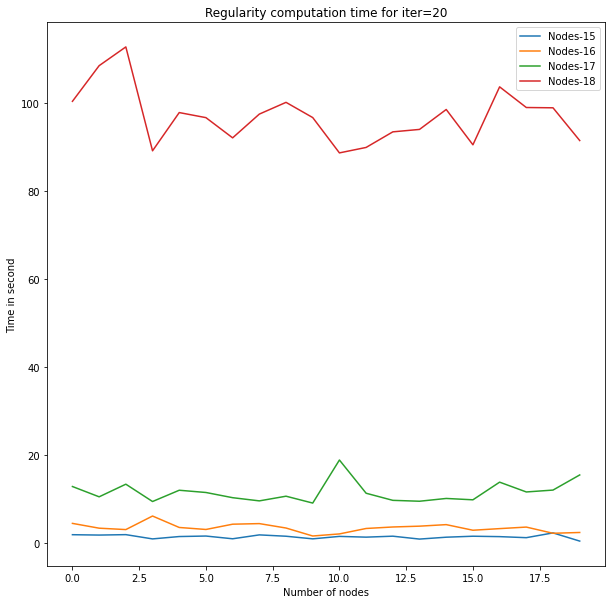

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Regularity computation time for iter=20")
plt.xlabel("Number of nodes")
plt.ylabel("Time in second")
plt.plot(list15, label='Nodes-15')
plt.plot(list16, label='Nodes-16')
plt.plot(list17, label='Nodes-17')
plt.plot(list18, label='Nodes-18')
plt.legend()
plt.show()


# Selection of Independent Variable

In [ ]:
df_avg

,avgDD,avgDIST,maxW,avgAD
1,10.276382,1004.167085,119.0,5.111809
2,13.170795,968.419817,99.0,8.269883
3,12.935115,963.722646,105.0,8.922392
4,13.593875,992.798935,107.0,9.070573
5,12.214470,958.350129,95.0,8.034884
...,...,...,...,...
496,14.236573,958.882353,103.0,8.439898
497,12.474734,954.015957,97.0,6.769947
498,12.790000,983.324286,95.0,8.112857
499,10.998667,981.076000,106.0,5.941333


In [ ]:
df_reg = pd.read_csv("test_10_500.txt", names = ["Regularity"])
df_reg.index = list(range(1,501))
df_reg

,Regularity
1,788
2,759
3,778
4,743
5,766
...,...
496,774
497,744
498,692
499,742


In [ ]:
df_comb = pd.concat([df_avg, df_reg], axis=1)
df_comb

,avgDD,avgDIST,maxW,avgAD,Regularity
1,10.276382,1004.167085,119.0,5.111809,788
2,13.170795,968.419817,99.0,8.269883,759
3,12.935115,963.722646,105.0,8.922392,778
4,13.593875,992.798935,107.0,9.070573,743
5,12.214470,958.350129,95.0,8.034884,766
...,...,...,...,...,...
496,14.236573,958.882353,103.0,8.439898,774
497,12.474734,954.015957,97.0,6.769947,744
498,12.790000,983.324286,95.0,8.112857,692
499,10.998667,981.076000,106.0,5.941333,742


Partial Correlation Coeefficient:


In [ ]:
import pingouin as pg



In [ ]:
a = pg.partial_corr(data=df_comb, x='avgDD', y='avgAD', covar=['avgDIST', 'maxW', 'Regularity'], method='spearman')
b=pg.partial_corr(data=df_comb, x='avgDIST', y='avgAD', covar=['avgDD', 'maxW', 'Regularity'], method='spearman')
c=pg.partial_corr(data=df_comb, x='maxW', y='avgAD', covar=['avgDD', 'avgDIST', 'Regularity'], method='spearman')
d=pg.partial_corr(data=df_comb, x='Regularity', y='avgAD', covar=[
                'avgDD', 'avgDIST', 'maxW'], method='spearman')
print(a)
print(b)
print(c)
print(d)


            n         r         CI95%          p-val
spearman  500  0.945506  [0.94, 0.95]  2.297847e-243
            n        r           CI95%     p-val
spearman  500 -0.13841  [-0.22, -0.05]  0.001983
            n         r          CI95%     p-val
spearman  500  0.055262  [-0.03, 0.14]  0.218765
            n         r          CI95%     p-val
spearman  500 -0.030798  [-0.12, 0.06]  0.493324


In [ ]:
a = pg.partial_corr(data=df_comb, x='avgDD', y='avgAD', covar=[
                    'avgDIST', 'maxW', 'Regularity'], method='pearson')
b = pg.partial_corr(data=df_comb, x='avgDIST', y='avgAD', covar=[
                    'avgDD', 'maxW', 'Regularity'], method='pearson')
c = pg.partial_corr(data=df_comb, x='maxW', y='avgAD', covar=[
                    'avgDD', 'avgDIST', 'Regularity'], method='pearson')
d = pg.partial_corr(data=df_comb, x='Regularity', y='avgAD', covar=[
    'avgDD', 'avgDIST', 'maxW'], method='pearson')
print(a)
print(b)
print(c)
print(d)


           n         r         CI95%          p-val
pearson  500  0.949534  [0.94, 0.96]  2.126088e-251
           n         r           CI95%     p-val
pearson  500 -0.146855  [-0.23, -0.06]  0.001025
           n         r          CI95%     p-val
pearson  500  0.060011  [-0.03, 0.15]  0.181648
           n         r          CI95%     p-val
pearson  500 -0.044954  [-0.13, 0.04]  0.317228


In [ ]:
print(df_comb.columns)
corr = df_comb.corr()
corr.style.background_gradient(cmap='coolwarm')


Index(['avgDD', 'avgDIST', 'maxW', 'avgAD', 'Regularity'], dtype='object')


,avgDD,avgDIST,maxW,avgAD,Regularity
avgDD,1.000000,0.008024,-0.019219,0.948346,0.022397
avgDIST,0.008024,1.000000,0.061029,-0.037429,-0.023092
maxW,-0.019219,0.061029,1.000000,-0.006877,0.429231
avgAD,0.948346,-0.037429,-0.006877,1.000000,0.015684
Regularity,0.022397,-0.023092,0.429231,0.015684,1.000000


<AxesSubplot:xlabel='Regularity', ylabel='Count'>

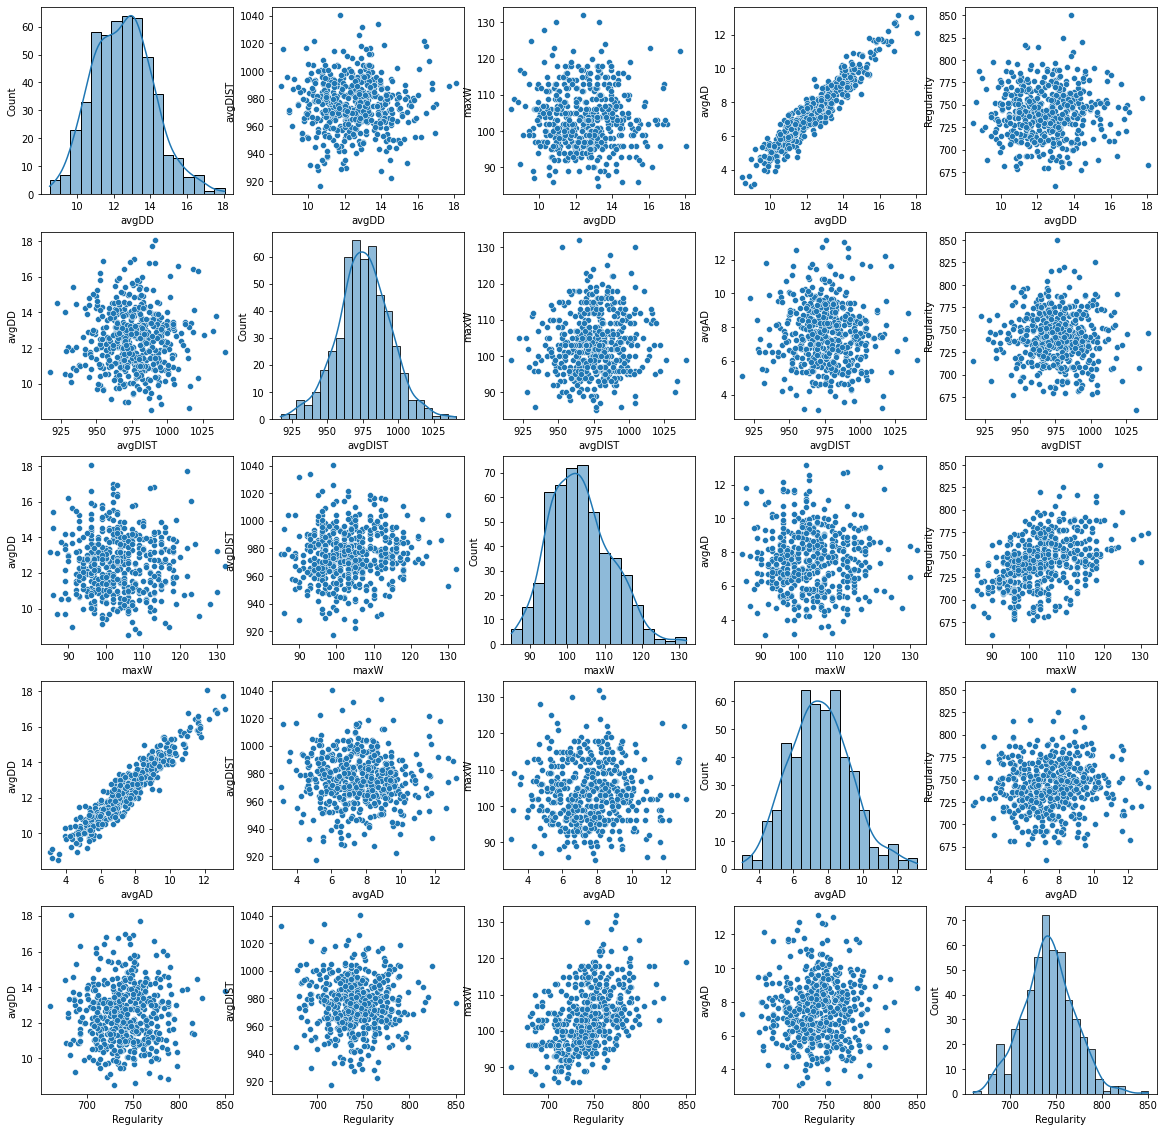

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(5, 5, 1) 
# sns.countplot('avgDD', hue='avgAD', data=df_avg)
sns.histplot(data=df_comb, x="avgDD", binwidth=None, kde=True)

plt.subplot(5, 5, 2) 
sns.scatterplot(data=df_comb, x="avgDD", y="avgDIST")


plt.subplot(5, 5, 3)
sns.scatterplot(data=df_comb, x="avgDD", y="maxW")

plt.subplot(5, 5, 4) 
sns.scatterplot(data=df_comb, x="avgDD", y="avgAD")

plt.subplot(5, 5, 5)
sns.scatterplot(data=df_comb, x="avgDD", y="Regularity") 

plt.subplot(5, 5, 6) 
sns.scatterplot(data=df_comb, x="avgDIST", y="avgDD")


plt.subplot(5, 5, 7)
# sns.scatterplot(data=df_avg, x="avgDD", y="avgDIST")
sns.histplot(data=df_comb, x="avgDIST", binwidth=None, kde=True)


plt.subplot(5, 5, 8)
sns.scatterplot(data=df_comb, x="avgDIST", y="maxW")

plt.subplot(5, 5, 9)
sns.scatterplot(data=df_comb, x="avgDIST", y="avgAD")

plt.subplot(5, 5, 10)
sns.scatterplot(data=df_comb, x="avgDIST", y="Regularity")

plt.subplot(5, 5, 11)
sns.scatterplot(data=df_comb, x='maxW',y='avgDD' )

plt.subplot(5, 5, 12)
sns.scatterplot(data=df_comb, x="maxW", y="avgDIST")


plt.subplot(5, 5, 13)
# sns.scatterplot(data=df_avg, x="maxW", y="maxW")
sns.histplot(data=df_comb, x="maxW", binwidth=None, kde=True)

plt.subplot(5, 5, 14)
sns.scatterplot(data=df_comb, x="maxW", y="avgAD")

plt.subplot(5, 5, 15)
sns.scatterplot(data=df_comb, x="maxW", y="Regularity")


plt.subplot(5, 5, 16)
sns.scatterplot(data = df_comb, x = "avgAD", y = "avgDD")

plt.subplot(5, 5, 17)
sns.scatterplot(data=df_comb, x="avgAD", y="avgDIST")

plt.subplot(5, 5, 18)
sns.scatterplot(data=df_comb, x="avgAD", y="maxW")

plt.subplot(5, 5, 19)
sns.histplot(data=df_comb, x="avgAD", binwidth=None, kde=True)

plt.subplot(5, 5, 20)
sns.scatterplot(data=df_comb, x="avgAD", y="Regularity")

plt.subplot(5, 5, 21)
sns.scatterplot(data=df_comb, x="Regularity", y="avgDD")

plt.subplot(5, 5, 22)
sns.scatterplot(data=df_comb, x="Regularity", y="avgDIST")

plt.subplot(5, 5, 23)
sns.scatterplot(data=df_comb, x="Regularity", y="maxW")

plt.subplot(5, 5, 24)
sns.scatterplot(data=df_comb, x="Regularity", y="avgAD")

plt.subplot(5, 5, 25)
sns.histplot(data=df_comb, x="Regularity", binwidth=None, kde=True)



In [ ]:
#plot color scaled correlation matrix
print(df_avg.columns)
corr = df_avg.corr()
corr.style.background_gradient(cmap='coolwarm')

Index(['avgDD', 'avgDIST', 'maxW', 'avgAD'], dtype='object')


,avgDD,avgDIST,maxW,avgAD
avgDD,1.000000,0.008024,-0.019219,0.948346
avgDIST,0.008024,1.000000,0.061029,-0.037429
maxW,-0.019219,0.061029,1.000000,-0.006877
avgAD,0.948346,-0.037429,-0.006877,1.000000


<AxesSubplot:xlabel='avgAD', ylabel='Count'>

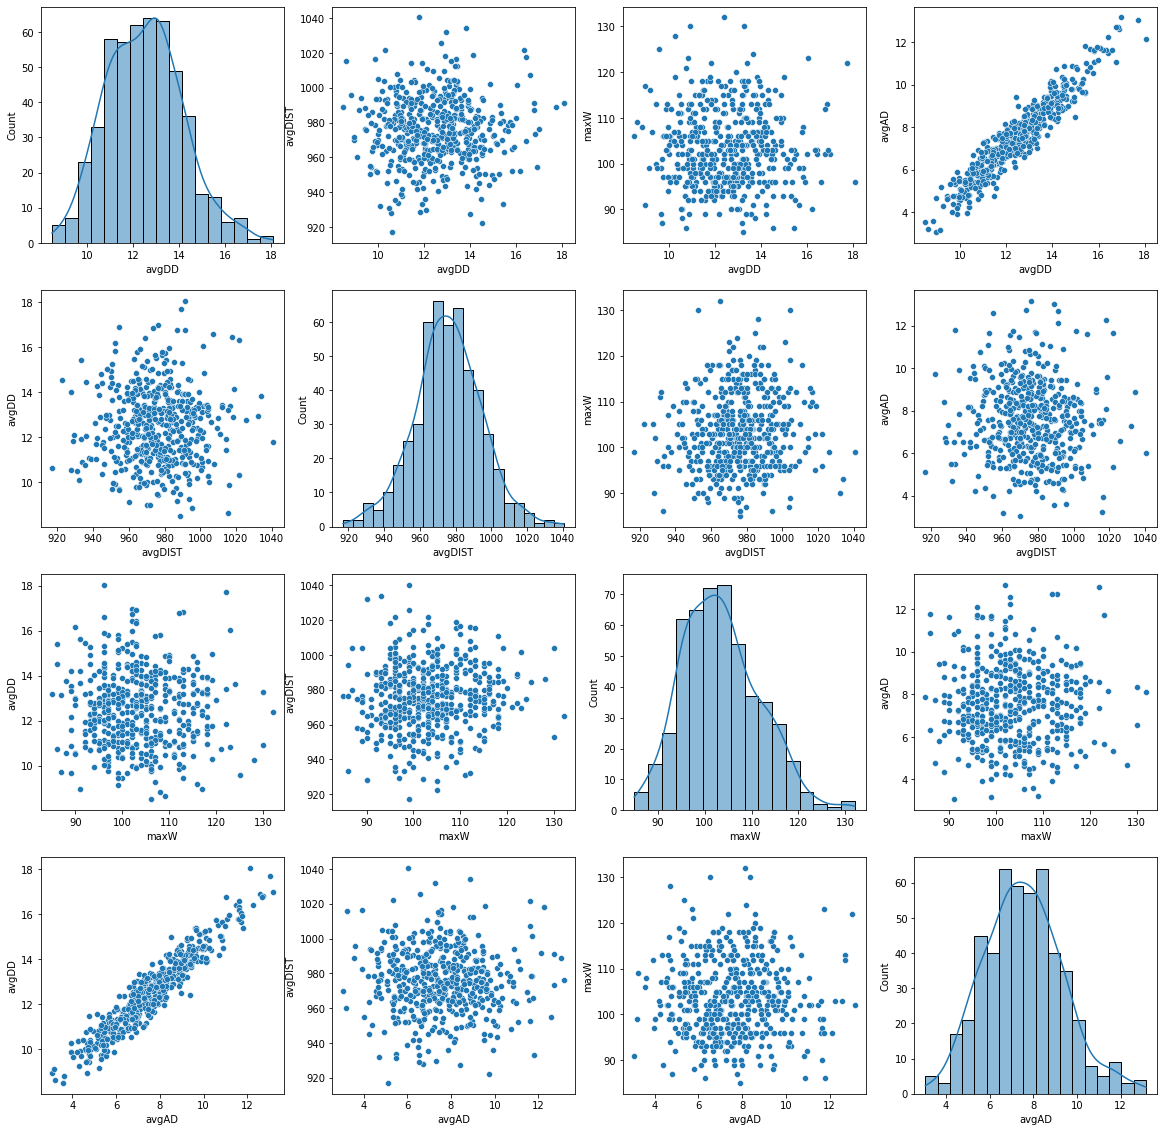

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 1) 
# sns.countplot('avgDD', hue='avgAD', data=df_avg)
sns.histplot(data=df_avg, x="avgDD", binwidth=None, kde=True)

plt.subplot(4, 4, 2) 
sns.scatterplot(data=df_avg, x="avgDD", y="avgDIST")


plt.subplot(4, 4, 3)
sns.scatterplot(data=df_avg, x="avgDD", y="maxW")

plt.subplot(4, 4, 4) 
sns.scatterplot(data=df_avg, x="avgDD", y="avgAD")


plt.subplot(4, 4, 5) 
sns.scatterplot(data=df_avg, x="avgDIST", y="avgDD")


plt.subplot(4, 4, 6)
# sns.scatterplot(data=df_avg, x="avgDD", y="avgDIST")
sns.histplot(data=df_avg, x="avgDIST", binwidth=None, kde=True)


plt.subplot(4, 4, 7)
sns.scatterplot(data=df_avg, x="avgDIST", y="maxW")

plt.subplot(4, 4, 8)
sns.scatterplot(data=df_avg, x="avgDIST", y="avgAD")


plt.subplot(4, 4, 9)
sns.scatterplot(data=df_avg, x='maxW',y='avgDD' )

plt.subplot(4, 4, 10)
sns.scatterplot(data=df_avg, x="maxW", y="avgDIST")


plt.subplot(4, 4, 11)
# sns.scatterplot(data=df_avg, x="maxW", y="maxW")
sns.histplot(data=df_avg, x="maxW", binwidth=None, kde=True)

plt.subplot(4, 4, 12)
sns.scatterplot(data=df_avg, x="maxW", y="avgAD")


plt.subplot(4, 4, 13)
sns.scatterplot(data = df_avg, x = "avgAD", y = "avgDD")

plt.subplot(4, 4, 14)
sns.scatterplot(data=df_avg, x="avgAD", y="avgDIST")

plt.subplot(4, 4, 15)
sns.scatterplot(data=df_avg, x="avgAD", y="maxW")

plt.subplot(4, 4, 16)
sns.histplot(data=df_avg, x="avgAD", binwidth=None, kde=True)


# Model Training

In [ ]:
from sklearn import linear_model

reg2 = linear_model.LinearRegression()
reg2.fit(df_avg[['avgDD', 'avgDIST', 'maxW']], df_avg.avgAD)

LinearRegression()

In [ ]:
print('RegCoefficient:\n', reg2.coef_)
a1 = reg2.coef_[0]
a2 = reg2.coef_[1]
k = reg2.intercept_
print('intercept:\n', reg2.intercept_)
# print(reg.predict([[-6, 223]]))
print(k.dtype)


RegCoefficient:
 [ 1.03202153 -0.00440861  0.00311379]
intercept:
 -1.370746224149582
float64


Partial Coefficient of correlation.

# Try:1
# 1 Variable
* avgDD


In [ ]:
# One Variable
import sklearn
from sklearn.model_selection import train_test_split

X = df_comb.filter(['avgDD'], axis=1)
Y = df_comb.filter(['avgAD'])
print(X.shape)
print(Y.shape)
sm_reg8 = sm.OLS(Y, X).fit()
print("avgDD")
print(sm_reg8.summary())


(500, 1)
(500, 1)
avgDD
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          3.651e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:33:54   Log-Likelihood:                         -658.19
No. Observations:                 500   AIC:                                      1318.
Df Residuals:                     499   BIC:                                      1323.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

# Try:2
# 1 Variable
* avgDIST

In [ ]:
# One Variable
import sklearn
from sklearn.model_selection import train_test_split

X = df_comb.filter(['avgDIST'], axis=1)
Y = df_comb.filter(['avgAD'])
print(X.shape)
print(Y.shape)
sm_reg8 = sm.OLS(Y, X).fit()
print("avgDD")
print(sm_reg8.summary())


(500, 1)
(500, 1)
avgDD
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              8716.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                   4.00e-318
Time:                        10:33:55   Log-Likelihood:                         -1005.8
No. Observations:                 500   AIC:                                      2014.
Df Residuals:                     499   BIC:                                      2018.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

# Try:3
# 1 Variable
* maxW

In [ ]:
# One Variable
import sklearn
from sklearn.model_selection import train_test_split

X = df_comb.filter(['maxW'], axis=1)
Y = df_comb.filter(['avgAD'])
print(X.shape)
print(Y.shape)
sm_reg8 = sm.OLS(Y, X).fit()
print("avgDD")
print(sm_reg8.summary())


(500, 1)
(500, 1)
avgDD
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              7874.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                   9.73e-308
Time:                        10:33:56   Log-Likelihood:                         -1029.7
No. Observations:                 500   AIC:                                      2061.
Df Residuals:                     499   BIC:                                      2066.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

# Try:4
# 1 Variable
* Regularity

In [ ]:
# One Variable
import sklearn
from sklearn.model_selection import train_test_split

X = df_comb.filter(['Regularity'], axis=1)
Y = df_comb.filter(['avgAD'])
print(X.shape)
print(Y.shape)
sm_reg8 = sm.OLS(Y, X).fit()
print("avgDD")
print(sm_reg8.summary())


(500, 1)
(500, 1)
avgDD
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              8652.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                   2.28e-317
Time:                        10:33:57   Log-Likelihood:                         -1007.5
No. Observations:                 500   AIC:                                      2017.
Df Residuals:                     499   BIC:                                      2021.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

# Try:5
# 2 Variable
* avgDD
* avgDIST


In [ ]:
# Two Variable
import sklearn
from sklearn.model_selection import train_test_split 

X = df_comb.filter(['avgDD', 'avgDIST'], axis=1) 
Y = df_comb.filter(['avgAD']) 
print(X.shape) 
print(Y.shape) 
sm_reg8 = sm.OLS(Y, X).fit() 
print("avgDD, avgDist") 
print(sm_reg8.summary()) 


(500, 2)
(500, 1)
avgDD, avgDist
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          4.690e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:33:57   Log-Likelihood:                         -423.86
No. Observations:                 500   AIC:                                      851.7
Df Residuals:                     498   BIC:                                      860.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

# Try:6
# 3 Variable
* avgDD
* avgDIST
* maxW


In [ ]:
# Three Variable
import sklearn
from sklearn.model_selection import train_test_split

X = df_comb.filter(['avgDD', 'avgDIST', 'maxW'], axis=1)
Y = df_comb.filter(['avgAD'])
print(X.shape)
print(Y.shape)
sm_reg8 = sm.OLS(Y, X).fit()
print("avgDD, avgDist, maxW")
print(sm_reg8.summary())

(500, 3)
(500, 1)
avgDD, avgDist, maxW
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.125e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:33:58   Log-Likelihood:                         -423.50
No. Observations:                 500   AIC:                                      853.0
Df Residuals:                     497   BIC:                                      865.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--

# Try:7
# 4 Varaible
* avgDD
* avgDIST
* maxW
* Regularity


In [ ]:
# Four Variable
import sklearn
from sklearn.model_selection import train_test_split

X = df_comb.filter(['avgDD', 'avgDIST', 'maxW', 'Regularity'], axis=1)
Y = df_comb.filter(['avgAD'])
print(X.shape) 
print(Y.shape) 
sm_reg7 = sm.OLS(Y, X).fit()
print("avgDD, avgDist, maxW, Regularity")
print(sm_reg7.summary())


(500, 4)
(500, 1)
avgDD, avgDist, maxW, Regularity
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.347e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:33:59   Log-Likelihood:                         -422.59
No. Observations:                 500   AIC:                                      853.2
Df Residuals:                     496   BIC:                                      870.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025   

In [ ]:

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
pts = X_test.shape[0]
print(pts)

(335, 4)
(165, 4)
(335, 1)
(165, 1)
165


# True vs Predicted value relation graph

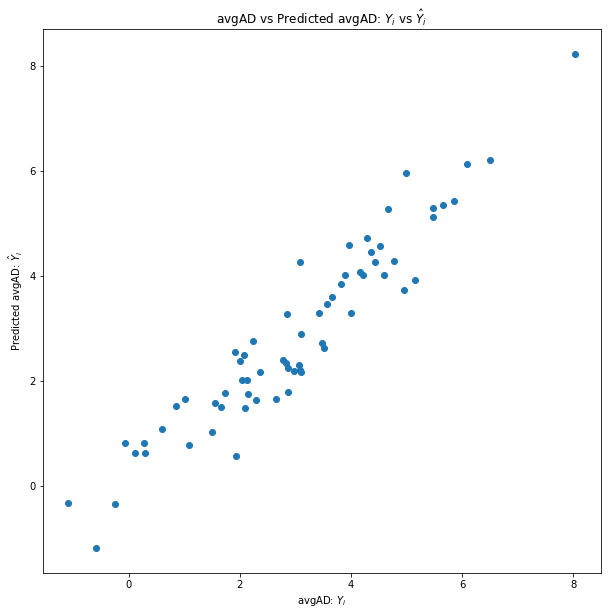

In [ ]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(Y_test, Y_pred)
plt.xlabel("avgAD: $Y_i$")
plt.ylabel("Predicted avgAD: $\hat{Y}_i$")
plt.title("avgAD vs Predicted avgAD: $Y_i$ vs $\hat{Y}_i$")
plt.show()


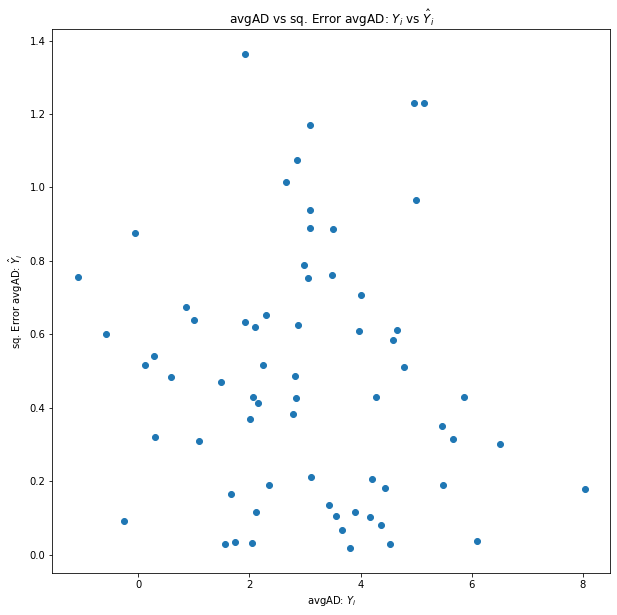

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(Y_test, abs(Y_pred-Y_test))
plt.xlabel("avgAD: $Y_i$")
plt.ylabel("sq. Error avgAD: $\hat{Y}_i$")
plt.title("avgAD vs sq. Error avgAD: $Y_i$ vs $\hat{Y}_i$")
plt.show()


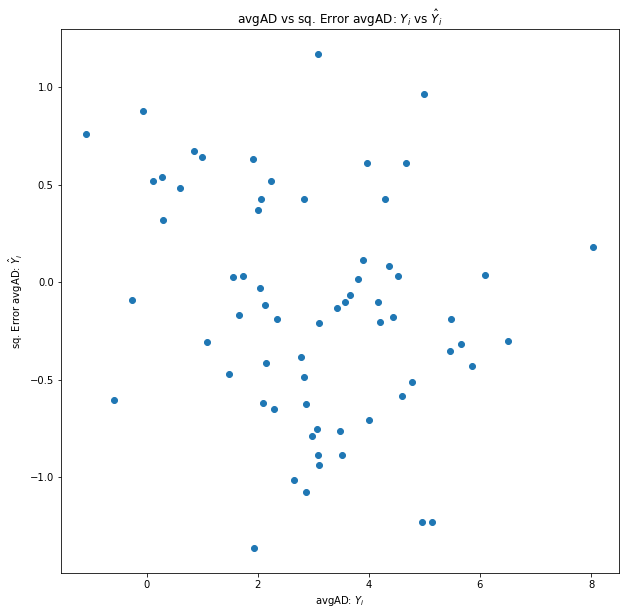

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(Y_test, (Y_pred-Y_test))
plt.xlabel("avgAD: $Y_i$")
plt.ylabel("sq. Error avgAD: $\hat{Y}_i$")
plt.title("avgAD vs sq. Error avgAD: $Y_i$ vs $\hat{Y}_i$")
plt.show()


<AxesSubplot:>

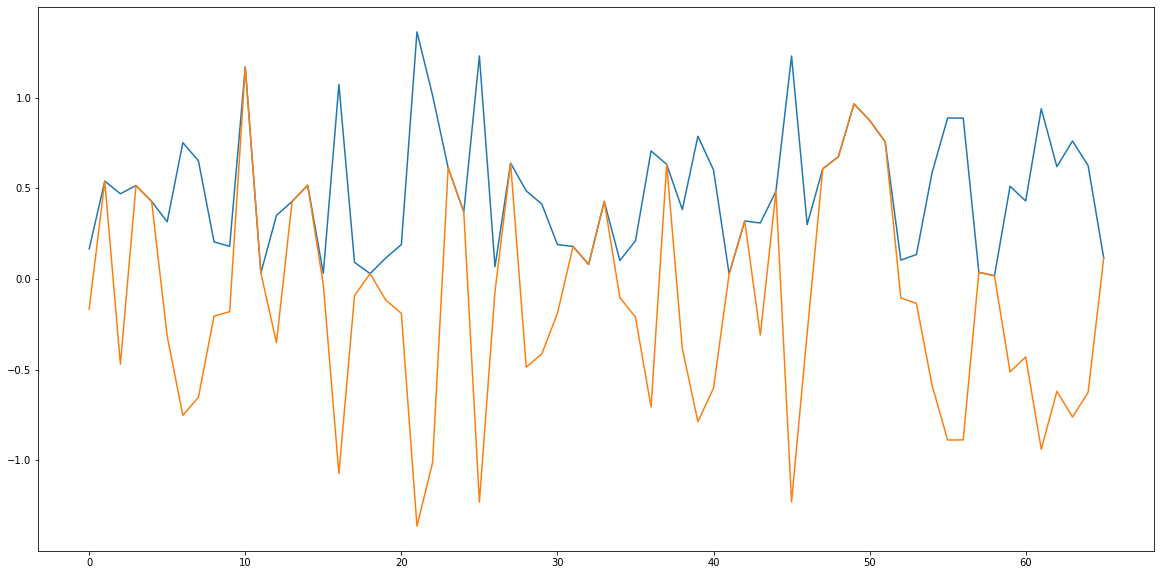

In [ ]:
from matplotlib.pyplot import plot
fig, ax = plt.subplots(figsize=(20,10))
qq = abs(Y_pred-Y_test)
q1 = pd.Series(qq.avgAD.tolist())
q2 = pd.Series((Y_pred-Y_test).avgAD.tolist())
# plot(q, range(660), 'rs', label='line 2') 
q1.plot.line()  # blueline - absolute error 
q2.plot.line() # Orange - error 
# print(Y_test.avgAD.tolist()) 


In [ ]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

print('Median Absolute Error  : ', median_absolute_error(Y_test, Y_pred))
print('Mean Squared Error     :', mean_squared_error(Y_test, Y_pred))

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 

print('Root Mean Squared Error:', rmse) 
print('R2 square: ', r2_score(Y_test, Y_pred)) 


Median Absolute Error  :  0.45034727930738094
Mean Squared Error     : 0.3511809010227948
Root Mean Squared Error: 0.5926051814005635
R2 square:  0.89402027413089


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


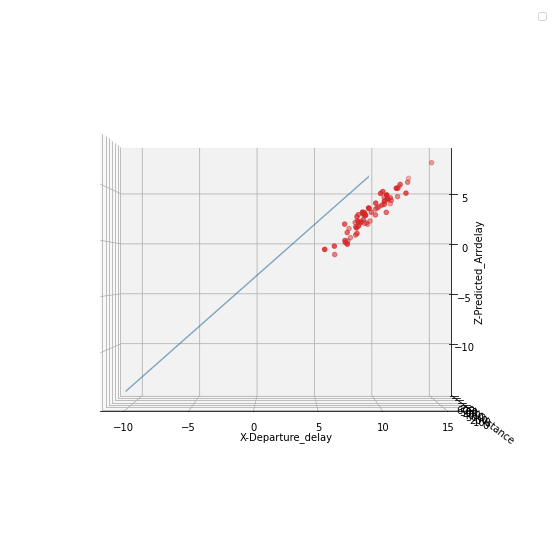

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection="3d")


xx2, yy2 = np.meshgrid(range(-10, 10), range(-10, 10))
xx2 = xx2.astype(float)
yy2 = yy2.astype(float)
zz2 = k + a1*xx2 + a2*yy2
ax.plot_surface(xx2, yy2, zz2, alpha=0.7)

z_points = np.array(Y_test)
x_points = np.array(X_test.iloc[:, 0])
y_points = np.array(X_test.iloc[:, 1])
ax.scatter3D(x_points, y_points, z_points, c='#d62728', cmap='hsv')

# Make legend, set axes limits and labels
ax.legend()
# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)
# ax.set_zlim(0, 10)
ax.set_xlabel('X-Departure_delay')
ax.set_ylabel('Y-Distance')
ax.set_zlabel('Z-Predicted_Arrdelay')
# ax.view_init(elev=30, azim=-90)       # 1
ax.view_init(elev=0, azim=-90)        # 2
# ax.view_init(elev=50, azim=-180)      # 3
# ax.view_init(elev=-50, azim=0)        # 4
# ax.view_init(elev=-30, azim=-100)        # 5
plt.show()


# ***

# For one month entire month

# ***

In [ ]:
# df_Graph02_1M = pd.read_csv(r'D:\KASHIF\Thesis_Mtech\DataSets\2019.csv\2019.csv')
# df_Graph02_1M

# df_Graph02_1Y_CV = pd.read_csv(r'D:\KASHIF\Thesis_Mtech\DataSets\2019.csv\2019.csv')
# df_Graph02_1Y_CV


In [ ]:
!wget "https://www.youtube.com/watch?v=o7In7se2Kl4&list=RDo7In7se2Kl4&start_radio=1"


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# df_Graph02_1M = df_Graph02_1M.copy()
# df_Graph02_1M.columns


# df_Graph02_1Y_CV
# df_Graph02_1Y_CV.columns


In [ ]:
# df_Graph02_1M = df_Graph02_1M[df_Graph02_1M['FL_DATE'].str.contains('2019-01')]
# df_Graph02_1M = df_Graph02_1M.drop(['FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM',
#                 'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
#                  'TAXI_IN', 'AIR_TIME', 'ARR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
#                  'LATE_AIRCRAFT_DELAY', 'Unnamed: 20'], axis=1)

# print(df_Graph02_1M)


# df_Graph02_1Y_CV
# df_Graph02_1Y_CV = df_Graph02_1Y_CV.drop([ 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM',
#                 'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
#                  'TAXI_IN', 'AIR_TIME', 'ARR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
#                  'LATE_AIRCRAFT_DELAY', 'Unnamed: 20'], axis=1)

# print(df_Graph02_1Y_CV)

In [ ]:
# df_Graph02_1M.to_csv('2019-01-XX.csv')
df_Graph02_1M = pd.read_csv(r'2019-01-XX.csv')


# df_Graph02_1Y_CV.to_csv('2019-XX-XX.csv')
df_Graph02_1Y_CV = pd.read_csv(r'2019-XX-XX.csv')


In [ ]:
df_Graph02_1Y_CV


,Unnamed: 0,FL_DATE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,DISTANCE
0,0,2019-01-01,GNV,ATL,1.0,-1.0,300.0
1,1,2019-01-01,MSP,CVG,-5.0,-36.0,596.0
2,2,2019-01-01,DTW,CVG,-5.0,-16.0,229.0
3,3,2019-01-01,TLH,ATL,-6.0,-14.0,223.0
4,4,2019-01-01,ATL,FSM,-15.0,-25.0,579.0
...,...,...,...,...,...,...,...
7422032,7422032,2019-12-31,MCO,SWF,64.0,52.0,989.0
7422033,7422033,2019-12-31,DCA,BOS,-6.0,-17.0,399.0
7422034,7422034,2019-12-31,PHL,BOS,-8.0,-34.0,280.0
7422035,7422035,2019-12-31,BOS,SJU,-1.0,-27.0,1674.0


In [ ]:
df11 = df_Graph02_1Y_CV[~df_Graph02_1Y_CV['FL_DATE'].str.contains('2019-01')]
df11 

,Unnamed: 0,FL_DATE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,DISTANCE
583985,583985,2019-02-01,LAX,SAT,-5.0,-13.0,1211.0
583986,583986,2019-02-01,CLT,JFK,-2.0,-22.0,541.0
583987,583987,2019-02-01,CLT,MIA,17.0,12.0,650.0
583988,583988,2019-02-01,MCO,LAX,-2.0,-21.0,2218.0
583989,583989,2019-02-01,MSY,CLT,-9.0,-3.0,651.0
...,...,...,...,...,...,...,...
7422032,7422032,2019-12-31,MCO,SWF,64.0,52.0,989.0
7422033,7422033,2019-12-31,DCA,BOS,-6.0,-17.0,399.0
7422034,7422034,2019-12-31,PHL,BOS,-8.0,-34.0,280.0
7422035,7422035,2019-12-31,BOS,SJU,-1.0,-27.0,1674.0


In [ ]:

numerical = [var for var in df_Graph02_1M.columns if df_Graph02_1M[var].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)


numerical_CV = [
    var for var in df_Graph02_1Y_CV.columns if df_Graph02_1Y_CV[var].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical_CV)))

print('The numerical variables are :', numerical_CV)


There are 4 numerical variables

The numerical variables are : ['Unnamed: 0', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE']
There are 4 numerical variables

The numerical variables are : ['Unnamed: 0', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE']


In [ ]:
print(df_Graph02_1M[numerical].isna().sum())

print(df_Graph02_1Y_CV[numerical_CV].isna().sum())

Unnamed: 0        0
DEP_DELAY     16355
ARR_DELAY     18022
DISTANCE          0
dtype: int64
Unnamed: 0         0
DEP_DELAY     130110
ARR_DELAY     153805
DISTANCE           0
dtype: int64


In [ ]:
print(df_Graph02_1M.columns)

print(df_Graph02_1Y_CV.columns)

Index(['Unnamed: 0', 'ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE'], dtype='object')
Index(['Unnamed: 0', 'FL_DATE', 'ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY',
       'DISTANCE'],
      dtype='object')


In [ ]:
medianArr = df_Graph02_1M.ARR_DELAY.median()
medianDep = df_Graph02_1M.DEP_DELAY.median()
# medianDist = df_Graph02_1M.DISTANCE.median()
print(medianArr, medianDep)

# replace NULL with median of arrdelay and depdelay
df_Graph02_1M.ARR_DELAY = df_Graph02_1M.ARR_DELAY.fillna(medianArr)
df_Graph02_1M.DEP_DELAY = df_Graph02_1M.DEP_DELAY.fillna(medianDep)
# df_Graph02_1M.DISTANCE = df_Graph02_1M.DISTANCE.fillna(medianDist)

# df_Graph02_1M.drop(['Unnamed: 0', 'FL_DATE', 'DEP_TIME','ARR_TIME', 'AIR_TIME'], axis=1, inplace=True)

print(df_Graph02_1M.head(10))


medianArr = df_Graph02_1Y_CV.ARR_DELAY.median()
medianDep = df_Graph02_1Y_CV.DEP_DELAY.median()
print(medianArr, medianDep)

# replace NULL with median of arrdelay and depdelay
df_Graph02_1Y_CV.ARR_DELAY = df_Graph02_1Y_CV.ARR_DELAY.fillna(medianArr)
df_Graph02_1Y_CV.DEP_DELAY = df_Graph02_1Y_CV.DEP_DELAY.fillna(medianDep)

# df_Graph02_1Y_CV.drop(['Unnamed: 0', 'FL_DATE', 'DEP_TIME','ARR_TIME', 'AIR_TIME'], axis=1, inplace=True)

print(df_Graph02_1Y_CV.head(10))


-7.0 -3.0
   Unnamed: 0 ORIGIN DEST  DEP_DELAY  ARR_DELAY  DISTANCE
0           0    GNV  ATL        1.0       -1.0     300.0
1           1    MSP  CVG       -5.0      -36.0     596.0
2           2    DTW  CVG       -5.0      -16.0     229.0
3           3    TLH  ATL       -6.0      -14.0     223.0
4           4    ATL  FSM      -15.0      -25.0     579.0
5           5    DAY  MSP       -7.0      -19.0     574.0
6           6    JAN  ATL       -5.0        9.0     341.0
7           7    LGA  CVG       -4.0        3.0     585.0
8           8    JAX  LGA       -8.0      -22.0     833.0
9           9    ATL  BMI        0.0      -14.0     533.0
-6.0 -2.0
   Unnamed: 0     FL_DATE ORIGIN DEST  DEP_DELAY  ARR_DELAY  DISTANCE
0           0  2019-01-01    GNV  ATL        1.0       -1.0     300.0
1           1  2019-01-01    MSP  CVG       -5.0      -36.0     596.0
2           2  2019-01-01    DTW  CVG       -5.0      -16.0     229.0
3           3  2019-01-01    TLH  ATL       -6.0      -14.0   

In [ ]:
print(df_Graph02_1M.shape)
df_Graph02_1Y_CV.shape


(583985, 6)


(7422037, 7)

In [ ]:
print(df_Graph02_1M[numerical].isna().sum())
df_Graph02_1Y_CV[numerical].isna().sum()


Unnamed: 0    0
DEP_DELAY     0
ARR_DELAY     0
DISTANCE      0
dtype: int64


Unnamed: 0    0
DEP_DELAY     0
ARR_DELAY     0
DISTANCE      0
dtype: int64

# Creating Poisson Distribution

In [ ]:
itrn = 2000
lamda = 750

nf = stats.poisson.rvs(size=itrn, mu=lamda)
print(nf[0:20])
# print(nf)
print(type(nf))
print(nf.size)


[778 710 724 747 720 736 739 749 748 780 762 753 718 739 721 730 789 785
 749 747]
<class 'numpy.ndarray'>
2000


In [ ]:
print(df_Graph02_1M.columns)


Index(['Unnamed: 0', 'ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE'], dtype='object')


import numpy as np

import statsmodels.api as sm

spector_data = sm.datasets.spector.load()

spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, spector_data.exog)

res = mod.fit()

print(res.summary())


In [ ]:
import random
df_filt = df_Graph01.copy()
# df_filt = df_Graph01[df_Graph01['ARR_DELAY']<50]
def findParameter(ss):
    avgDD = ss.DEP_DELAY.mean()
    avgAD = ss.ARR_DELAY.mean()
    avgDist = ss.DISTANCE.mean()
    W = ss.groupby(['DEST'])['DEST'].count() 
    maxW=W.max() 
    # print(maxW)
    return avgDD, avgDist, maxW, avgAD 
    

sampleList = []
resultDep = []
data = {  'avgDD': [],
          'avgDIST': [],
          'maxW': [],
          'avgAD': []}
df_Graph02_1M_avg = pd.DataFrame(data)


for i in range(itrn):
    row = [None]*4
    ss = df_Graph02_1M.sample(n=nf[i], replace = True,  random_state=None)
    avgDD, avgDist, maxW, avgAD = findParameter(ss)
    row[0] = avgDD
    row[1]=avgDist
    row[2]=maxW
    row[3]=avgAD
    df_Graph02_1M_avg.loc[len(df_Graph02_1M_avg.index)+1] = row

print(df_Graph02_1M_avg)
df_Graph02_1M_avg.to_csv('df_Graph02_1M_avg.csv')


          avgDD     avgDIST  maxW     avgAD
1      9.934447  781.548843  39.0  4.566838
2      8.059155  780.209859  36.0  2.640845
3     13.727901  803.928177  48.0  8.801105
4      9.655957  799.776439  44.0  3.618474
5      5.811111  776.644444  37.0  0.316667
...         ...         ...   ...       ...
1996   7.164962  807.373402  43.0  1.765985
1997   8.879195  805.002685  35.0  2.046980
1998   9.455263  808.251316  50.0  4.071053
1999  10.547912  834.119165  54.0  4.766585
2000   9.616531  806.207317  34.0  4.983740

[2000 rows x 4 columns]


# Selection of Independent Variable

In [ ]:
#plot color scaled correlation matrix
print(df_Graph02_1M_avg.columns)
corr = df_Graph02_1M_avg.corr()
corr.style.background_gradient(cmap='coolwarm')

Index(['avgDD', 'avgDIST', 'maxW', 'avgAD'], dtype='object')


,avgDD,avgDIST,maxW,avgAD
avgDD,1.000000,-0.012448,0.027377,0.952416
avgDIST,-0.012448,1.000000,-0.035889,-0.053213
maxW,0.027377,-0.035889,1.000000,0.027407
avgAD,0.952416,-0.053213,0.027407,1.000000


<AxesSubplot:xlabel='avgAD', ylabel='Count'>

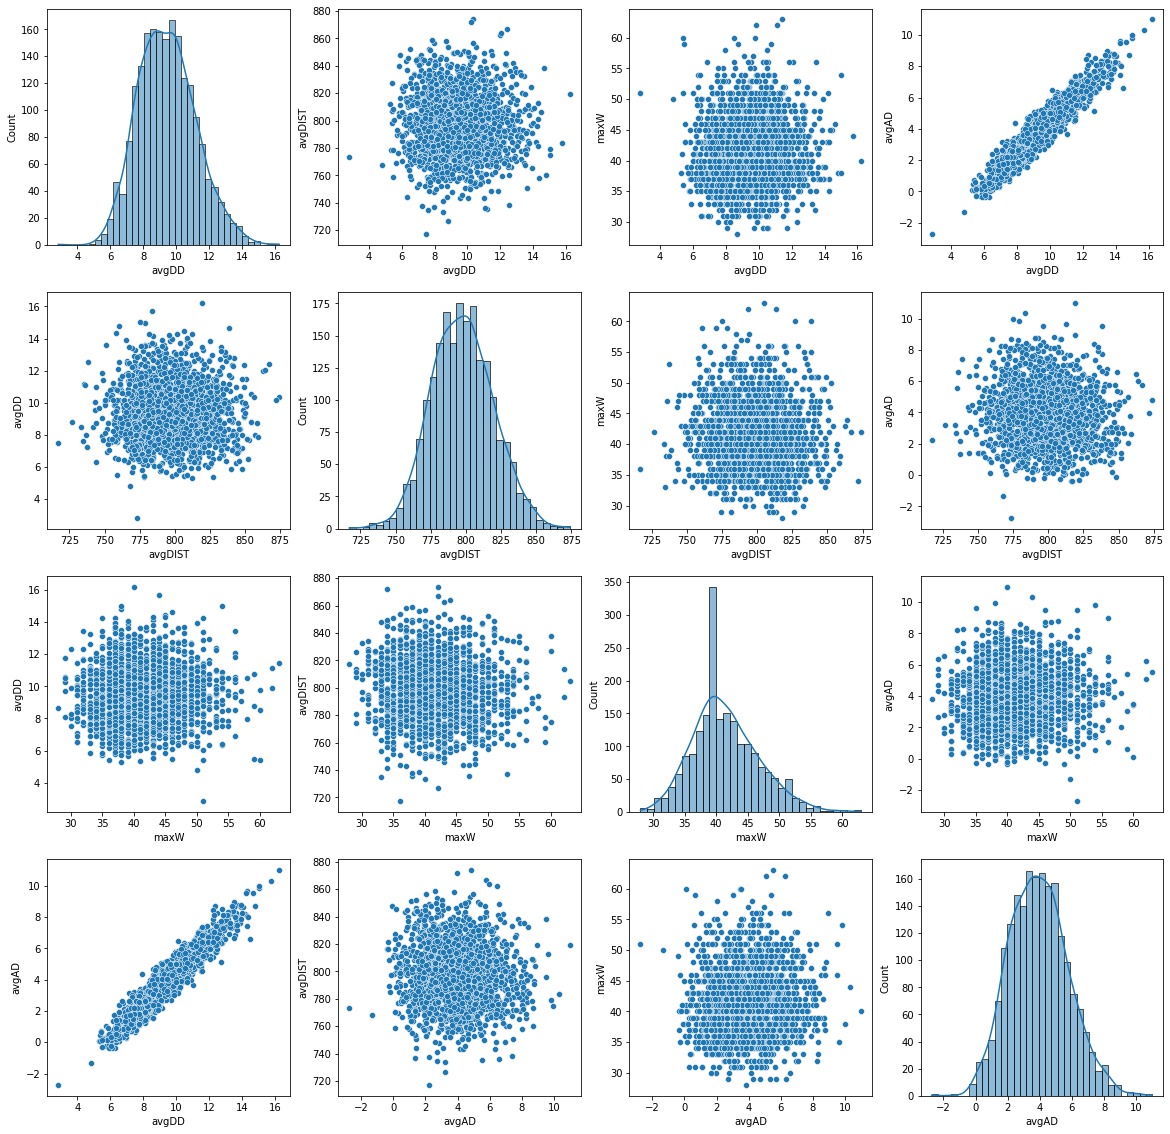

In [ ]:
plt.figure(figsize=(20, 20))


plt.subplot(4, 4, 1) 
# sns.countplot('avgDD', hue='avgAD', data=df_Graph02_1M_avg)
sns.histplot(data=df_Graph02_1M_avg, x="avgDD", binwidth=None, kde=True)

plt.subplot(4, 4, 2) 
sns.scatterplot(data=df_Graph02_1M_avg, x="avgDD", y="avgDIST")


plt.subplot(4, 4, 3)
sns.scatterplot(data=df_Graph02_1M_avg, x="avgDD", y="maxW")

plt.subplot(4, 4, 4) 
sns.scatterplot(data=df_Graph02_1M_avg, x="avgDD", y="avgAD")


plt.subplot(4, 4, 5) 
sns.scatterplot(data=df_Graph02_1M_avg, x="avgDIST", y="avgDD")


plt.subplot(4, 4, 6)
# sns.scatterplot(data=df_Graph02_1M_avg, x="avgDD", y="avgDIST")
sns.histplot(data=df_Graph02_1M_avg, x="avgDIST", binwidth=None, kde=True)


plt.subplot(4, 4, 7)
sns.scatterplot(data=df_Graph02_1M_avg, x="avgDIST", y="maxW")

plt.subplot(4, 4, 8)
sns.scatterplot(data=df_Graph02_1M_avg, x="avgDIST", y="avgAD")


plt.subplot(4, 4, 9)
sns.scatterplot(data=df_Graph02_1M_avg, x='maxW',y='avgDD' )

plt.subplot(4, 4, 10)
sns.scatterplot(data=df_Graph02_1M_avg, x="maxW", y="avgDIST")


plt.subplot(4, 4, 11)
# sns.scatterplot(data=df_Graph02_1M_avg, x="maxW", y="maxW")
sns.histplot(data=df_Graph02_1M_avg, x="maxW", binwidth=None, kde=True)

plt.subplot(4, 4, 12)
sns.scatterplot(data=df_Graph02_1M_avg, x="maxW", y="avgAD")


plt.subplot(4, 4, 13)
sns.scatterplot(data = df_Graph02_1M_avg, x = "avgDD", y = "avgAD")

plt.subplot(4, 4, 14)
sns.scatterplot(data=df_Graph02_1M_avg, x="avgAD", y="avgDIST")

plt.subplot(4, 4, 15)
sns.scatterplot(data=df_Graph02_1M_avg, x="avgAD", y="maxW")

plt.subplot(4, 4, 16)
sns.histplot(data=df_Graph02_1M_avg, x="avgAD", binwidth=None, kde=True)


# Pair Plot

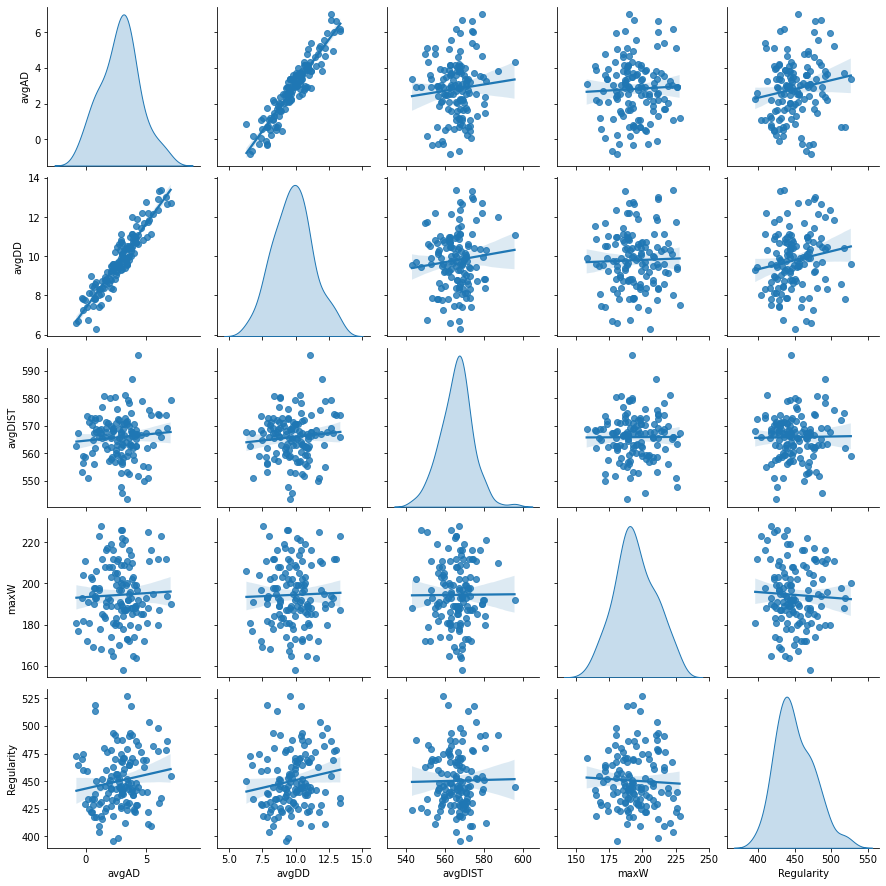

In [ ]:
train_dataset = X_train.copy()
train_dataset.insert(0, "avgAD", Y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")


In [ ]:
from sklearn import linear_model

reg_1M = linear_model.LinearRegression()
reg_1M.fit(df_Graph02_1M_avg[['avgDD', 'avgDIST','maxW']].values, 
                                            df_Graph02_1M_avg.avgAD.values)




LinearRegression()

In [ ]:
print('RegCoefficient:\n', reg_1M.coef_)
# b1 = reg_1M.coef_[0]
# b2 = reg_1M.coef_[1]
# b3 = reg_1M.coef_[2]
# k = reg_1M.intercept_

print('intercept:\n', reg_1M.intercept_)
print(reg_1M.predict([[-6, 223, 50]]))
# print(k.dtype)
# 1.00081787e+00*(-6) - (2.16647788e-03)*223 + 
# (4.76362906e-05)*50-3.777675062734894

RegCoefficient:
 [ 9.92730037e-01 -3.43155796e-03 -4.72320779e-05]
intercept:
 -2.6921618753246928
[-9.41614112]


# Three Variable

In [ ]:
import sklearn
import sklearn.metrics 
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X = df_Graph02_1M_avg.filter(['avgDIST','avgDD', 'maxW'], axis=1)
Y = df_Graph02_1M_avg.filter(['avgAD'])
print(X.shape)
print(Y.shape)


# Using statsmodel 

# sm_reg = sm.OLS(Y, X).fit()
# print(sm_reg.summary())
# X2 = sm.add_constant(X)
X2 = X.copy()
# print(X2.head())
# print(Y.head())
sm_reg_1M1 = sm.OLS(Y, X2).fit()
print("avgDD, avgDist, maxW")
print(sm_reg_1M1.summary())


(2000, 3)
(2000, 1)
avgDD, avgDist, maxW
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.037e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:06:47   Log-Likelihood:                         -1649.0
No. Observations:                2000   AIC:                                      3304.
Df Residuals:                    1997   BIC:                                      3321.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]


# Two variable

In [ ]:
# print(X2.head())
X3 = X2.copy()
X3.drop(['maxW'], axis=1, inplace=True)
# print(X3.head())
sm_reg_1M2 = sm.OLS(Y, X3).fit()
print("avgDD, avgDist")
print(sm_reg_1M2.summary())


avgDD, avgDist
                                 OLS Regression Results                                
Dep. Variable:                  avgAD   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          6.052e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:06:47   Log-Likelihood:                         -1650.1
No. Observations:                2000   AIC:                                      3304.
Df Residuals:                    1998   BIC:                                      3315.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [ ]:

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
pts = X_test.shape[0]
print(pts)

(1340, 3)
(660, 3)
(1340, 1)
(660, 1)
660


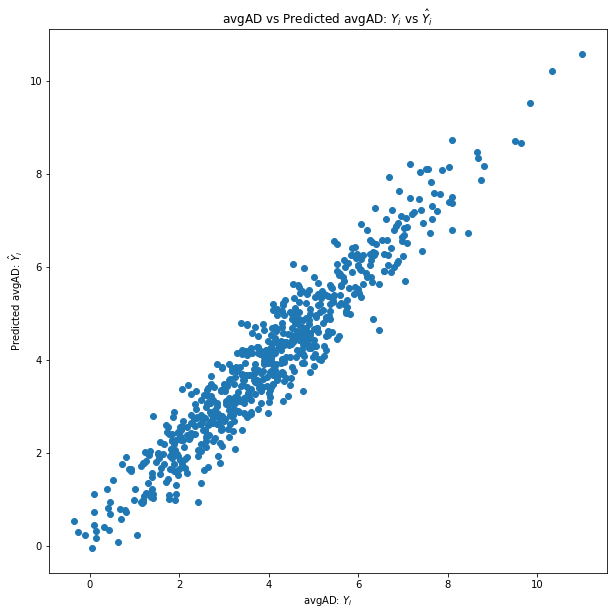

In [ ]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(Y_test, Y_pred)
plt.xlabel("avgAD: $Y_i$")
plt.ylabel("Predicted avgAD: $\hat{Y}_i$")
plt.title("avgAD vs Predicted avgAD: $Y_i$ vs $\hat{Y}_i$")
plt.show()


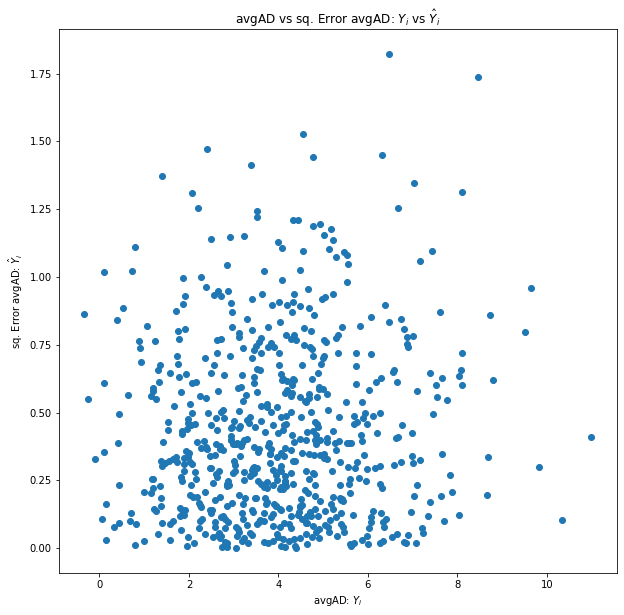

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(Y_test, abs(Y_pred-Y_test))
plt.xlabel("avgAD: $Y_i$")
plt.ylabel("sq. Error avgAD: $\hat{Y}_i$")
plt.title("avgAD vs sq. Error avgAD: $Y_i$ vs $\hat{Y}_i$")
plt.show()


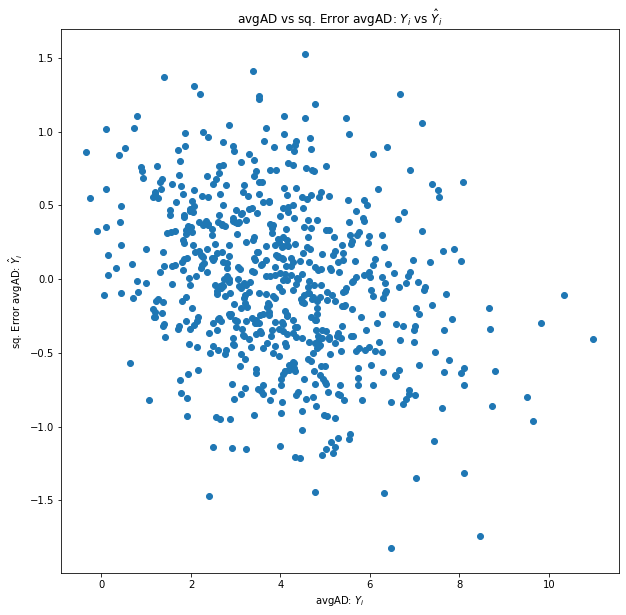

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(Y_test, (Y_pred-Y_test))
plt.xlabel("avgAD: $Y_i$")
plt.ylabel("sq. Error avgAD: $\hat{Y}_i$")
plt.title("avgAD vs sq. Error avgAD: $Y_i$ vs $\hat{Y}_i$")
plt.show()


<AxesSubplot:>

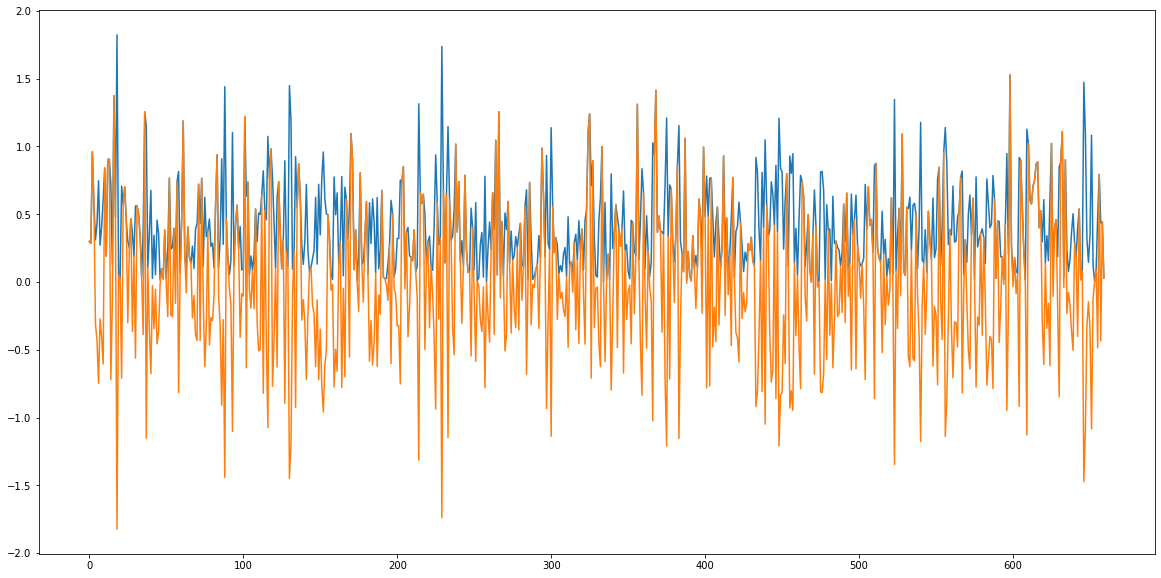

In [ ]:
from matplotlib.pyplot import plot
fig, ax = plt.subplots(figsize=(20,10))
qq = abs(Y_pred-Y_test)
q1 = pd.Series(qq.avgAD.tolist())
q2 = pd.Series((Y_pred-Y_test).avgAD.tolist())
# plot(q, range(660), 'rs', label='line 2') 
q1.plot.line()  # blueline - absolute error 
q2.plot.line() # Orange - error 
# print(Y_test.avgAD.tolist()) 


In [ ]:
from sklearn.metrics import r2_score
from math import sqrt 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

print('Median Absolute Error  : ', median_absolute_error(Y_test, Y_pred))
print('Mean Squared Error     :', mean_squared_error(Y_test, Y_pred))

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 

print('Root Mean Squared Error:', rmse) 
print('R2 square: ', r2_score(Y_test, Y_pred)) 


Median Absolute Error  :  0.3687288415217924
Mean Squared Error     : 0.2953044834781978
Root Mean Squared Error: 0.5434192520312451
R2 square:  0.9136645087571134


# ***
# Cross Validation on Entire Year Data.
# ***

# compute df_Graph02_1Y_CV_avg

In [ ]:
# df11 = df_Graph02_1Y_CV.copy()
# df11


In [ ]:
import random
# df_filt = df_Graph02_1Y_CV.copy()
# df_filt = df_Graph01[df_Graph01['ARR_DELAY']<50]


def findParameter(ss):
    avgDD = ss.DEP_DELAY.mean()
    avgAD = ss.ARR_DELAY.mean()
    avgDist = ss.DISTANCE.mean()
    W = ss.groupby(['DEST'])['DEST'].count()
    maxW = W.max()
    # print(maxW)
    return avgDD, avgDist, maxW, avgAD


sampleList = []
resultDep = []
data = {'avgDD': [],
        'avgDIST': [],
        'maxW': [],
        'avgAD': []}
df_Graph02_1Y_avg = pd.DataFrame(data)


for i in range(itrn):
    row = [None]*4
    ss = df11.sample(n=nf[i], replace=True,  random_state=None)
    avgDD, avgDist, maxW, avgAD = findParameter(ss)
    row[0] = avgDD
    row[1] = avgDist
    row[2] = maxW
    row[3] = avgAD
    df_Graph02_1Y_avg.loc[len(df_Graph02_1Y_avg.index)+1] = row

print(df_Graph02_1Y_avg)
df_Graph02_1Y_avg.to_csv('df_Graph02_1Y_avg.csv')


          avgDD     avgDIST  maxW     avgAD
1      9.537451  808.187661  51.0  5.136842
2     10.750000  792.108451  36.0  4.347639
3     10.799431  834.139503  34.0  4.718571
4      7.289009  763.850067  33.0  2.344687
5     11.157746  814.312500  43.0  6.076164
...         ...         ...   ...       ...
1996  11.273438  807.804348  40.0  6.079531
1997  11.220708  848.601342  46.0  5.890561
1998  10.918775  806.398684  39.0  5.290495
1999  10.932752  795.024570  42.0  4.811250
2000  14.242382  798.169377  38.0  9.137500

[2000 rows x 4 columns]


## df_Graph02_1Y_CV
## df_Graph02_1M

In [ ]:
# df_Graph02_1Y_CV
# df_Graph02_1M
print(df_Graph02_1M_avg.head())
print(df_Graph02_1Y_avg.head())


       avgDD     avgDIST  maxW     avgAD
1   9.934447  781.548843  39.0  4.566838
2   8.059155  780.209859  36.0  2.640845
3  13.727901  803.928177  48.0  8.801105
4   9.655957  799.776439  44.0  3.618474
5   5.811111  776.644444  37.0  0.316667
       avgDD     avgDIST  maxW     avgAD
1   9.537451  808.187661  51.0  5.136842
2  10.750000  792.108451  36.0  4.347639
3  10.799431  834.139503  34.0  4.718571
4   7.289009  763.850067  33.0  2.344687
5  11.157746  814.312500  43.0  6.076164


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC


In [ ]:
print('RegCoefficient:\n', reg_1M.coef_)
print('intercept:\n', reg_1M.intercept_)
print(reg_1M.predict([[10, 500, 50]]))

# a = np.array(df_Graph02_1Y_avg.shape[0])
a = np.empty((df_Graph02_1Y_avg.shape[0]))
for i in range(df_Graph02_1Y_avg.shape[0]):
    temp = df_Graph02_1Y_avg.iloc[i,:]
    a[i] = reg_1M.predict([[temp[0], temp[1], temp[2]]])



RegCoefficient:
 [ 9.92730037e-01 -3.43155796e-03 -4.72320779e-05]
intercept:
 -2.6921618753246928
[5.51699791]


In [ ]:
df_Graph02_1Y_avg['Pred_avgAD'] = a
df_Graph02_1Y_avg 

,avgDD,avgDIST,maxW,avgAD,Pred_avgAD
1,9.537451,808.187661,51.0,5.136842,4.000200
2,10.750000,792.108451,36.0,4.347639,5.259820
3,10.799431,834.139503,34.0,4.718571,5.164754
4,7.289009,763.850067,33.0,2.344687,1.921102
5,11.157746,814.312500,43.0,6.076164,5.588077
...,...,...,...,...,...
1996,11.273438,807.804348,40.0,6.079531,5.725401
1997,11.220708,848.601342,46.0,5.890561,5.532775
1998,10.918775,806.398684,39.0,5.290495,5.378188
1999,10.932752,795.024570,42.0,4.811250,5.430953


In [ ]:
# from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
YY_pred = df_Graph02_1Y_avg['Pred_avgAD']
YY_true = df_Graph02_1Y_avg['avgAD']

mse = sm.mean_squared_error(YY_true, YY_pred, squared=True)
rmse = sm.mean_squared_error(YY_true, YY_pred, squared=False)
MAE = sm.mean_absolute_error(YY_true, YY_pred)
MdAE = sm.median_absolute_error(YY_true, YY_pred)
r2 = sm.r2_score(YY_true, YY_pred) 
print(mse)
print(rmse)
print(MAE)
print(MdAE)
print(r2)


0.28177890922703874
0.5308285120705544
0.41996721249263014
0.353606793073602
0.9294118041475503


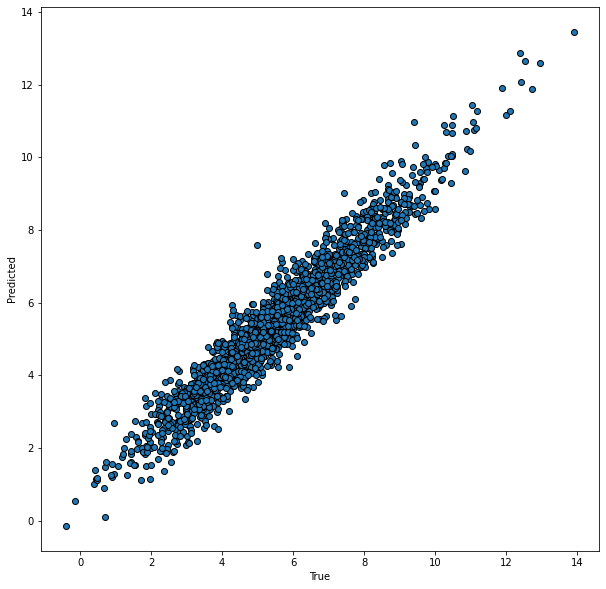

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(YY_true, YY_pred, edgecolors=(0, 0, 0))
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
plt.show()